In [205]:
import nltk

from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stone\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\stone\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\stone\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [114]:
# Importing the sentiment data. Need to encode with unicode escape probably due to unrecognized characters in a number of tweet_text values

df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='unicode_escape')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [116]:
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [117]:
df['tweet_text'].value_counts()

RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw                                 5
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw                                              4
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW                                 4
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW                                              3
RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter                                       2
                                                                                                                                              ..
Great interview to @mention on Bloomberg TV about #Ipad2 to kick off #SxSW.#apple {link}                                          

In [118]:
df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [119]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [120]:
df.isnull().values.any()

True

In [121]:
df = df.replace(np.nan, 'Unknown')

encoding sentiment column

In [122]:
encoder = OneHotEncoder(categories = 'auto', drop='if_binary')
ct = ColumnTransformer(transformers=[('ohe', encoder, ['is_there_an_emotion_directed_at_a_brand_or_product'])], remainder='passthrough')

pd.DataFrame(ct.fit_transform(df), columns = ct.get_feature_names())

c:\users\stone\pycharmprojects\sentiment_analysis_nlp_project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ohe__x0_I can't tell,ohe__x0_Negative emotion,ohe__x0_No emotion toward brand or product,ohe__x0_Positive emotion,tweet_text,emotion_in_tweet_is_directed_at
0,0.0,1.0,0.0,0.0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone
1,0.0,0.0,0.0,1.0,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App
2,0.0,0.0,0.0,1.0,@swonderlin Can not wait for #iPad 2 also. The...,iPad
3,0.0,1.0,0.0,0.0,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App
4,0.0,0.0,0.0,1.0,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google
...,...,...,...,...,...,...
9088,0.0,0.0,0.0,1.0,Ipad everywhere. #SXSW {link},iPad
9089,0.0,0.0,1.0,0.0,"Wave, buzz... RT @mention We interrupt your re...",Unknown
9090,0.0,0.0,1.0,0.0,"Google's Zeiger, a physician never reported po...",Unknown
9091,0.0,0.0,1.0,0.0,Some Verizon iPhone customers complained their...,Unknown


In [123]:
tokenized_review = []
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
for row in df['tweet_text']:
    for word in tokenizer.tokenize(row):
        tokenized_review.append(word)
#     except TypeError:
#         print(row)

tokenized_review

['wesley83',
 'I',
 'have',
 'a',
 '3G',
 'iPhone',
 'After',
 '3',
 'hrs',
 'tweeting',
 'at',
 'RISE',
 'Austin',
 'it',
 'was',
 'dead',
 'I',
 'need',
 'to',
 'upgrade',
 'Plugin',
 'stations',
 'at',
 'SXSW',
 'jessedee',
 'Know',
 'about',
 'fludapp',
 'Awesome',
 'iPad',
 'iPhone',
 'app',
 'that',
 'you',
 'll',
 'likely',
 'appreciate',
 'for',
 'its',
 'design',
 'Also',
 'they',
 're',
 'giving',
 'free',
 'Ts',
 'at',
 'SXSW',
 'swonderlin',
 'Can',
 'not',
 'wait',
 'for',
 'iPad',
 '2',
 'also',
 'They',
 'should',
 'sale',
 'them',
 'down',
 'at',
 'SXSW',
 'sxsw',
 'I',
 'hope',
 'this',
 'year',
 's',
 'festival',
 'isn',
 't',
 'as',
 'crashy',
 'as',
 'this',
 'year',
 's',
 'iPhone',
 'app',
 'sxsw',
 'sxtxstate',
 'great',
 'stuff',
 'on',
 'Fri',
 'SXSW',
 'Marissa',
 'Mayer',
 'Google',
 'Tim',
 'O',
 'Reilly',
 'tech',
 'books',
 'conferences',
 'amp',
 'Matt',
 'Mullenweg',
 'Wordpress',
 'teachntech00',
 'New',
 'iPad',
 'Apps',
 'For',
 'SpeechTherapy',
 'And

In [124]:
fdist = FreqDist(tokenized_review)
print(fdist)

<FreqDist with 12237 samples and 166995 outcomes>


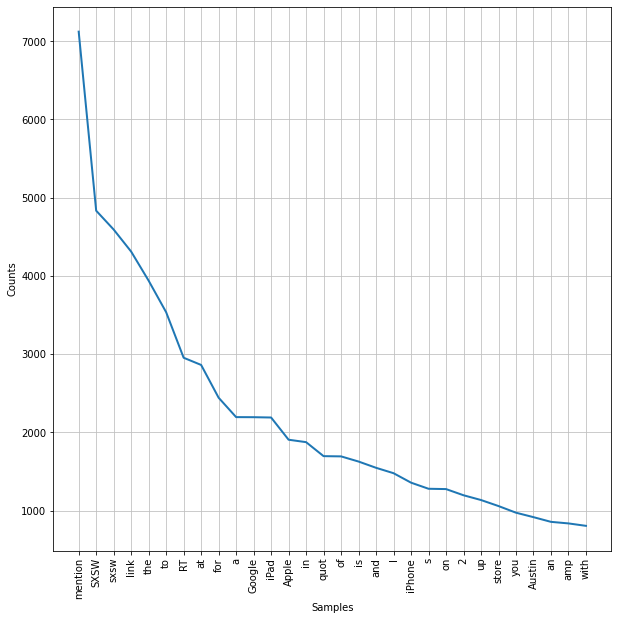

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [125]:
plt.figure(figsize=(10,10))
fdist.plot(30)

In [126]:
filtered_review = []

for w in tokenized_review:
    if w.lower() not in stopwords.words('english'):
        filtered_review.append(w.lower())

<FreqDist with 9549 samples and 114305 outcomes>


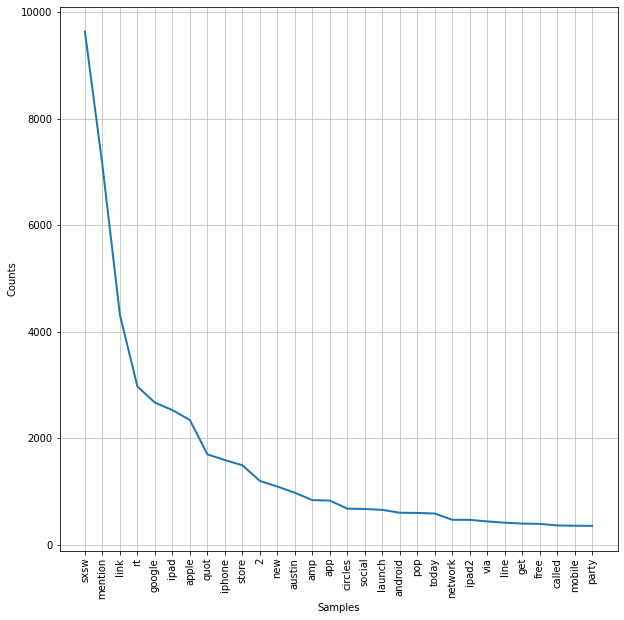

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [127]:
fdist = FreqDist(filtered_review)
print(fdist)
plt.figure(figsize=(10,10))
fdist.plot(30)

In [128]:
lemmatizer = WordNetLemmatizer()

lemmatized_review = []
for w in filtered_review:
    lemmatized_review.append(lemmatizer.lemmatize(w))


In [129]:
lemmatized_review

['wesley83',
 '3g',
 'iphone',
 '3',
 'hr',
 'tweeting',
 'rise',
 'austin',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'station',
 'sxsw',
 'jessedee',
 'know',
 'fludapp',
 'awesome',
 'ipad',
 'iphone',
 'app',
 'likely',
 'appreciate',
 'design',
 'also',
 'giving',
 'free',
 't',
 'sxsw',
 'swonderlin',
 'wait',
 'ipad',
 '2',
 'also',
 'sale',
 'sxsw',
 'sxsw',
 'hope',
 'year',
 'festival',
 'crashy',
 'year',
 'iphone',
 'app',
 'sxsw',
 'sxtxstate',
 'great',
 'stuff',
 'fri',
 'sxsw',
 'marissa',
 'mayer',
 'google',
 'tim',
 'reilly',
 'tech',
 'book',
 'conference',
 'amp',
 'matt',
 'mullenweg',
 'wordpress',
 'teachntech00',
 'new',
 'ipad',
 'apps',
 'speechtherapy',
 'communication',
 'showcased',
 'sxsw',
 'conference',
 'http',
 'ht',
 'ly',
 '49n4m',
 'iear',
 'edchat',
 'asd',
 'unknown',
 'sxsw',
 'starting',
 'ctia',
 'around',
 'corner',
 'googleio',
 'hop',
 'skip',
 'jump',
 'good',
 'time',
 'android',
 'fan',
 'beautifully',
 'smart',
 'simple',
 'idea',
 'rt'

<FreqDist with 8800 samples and 114305 outcomes>


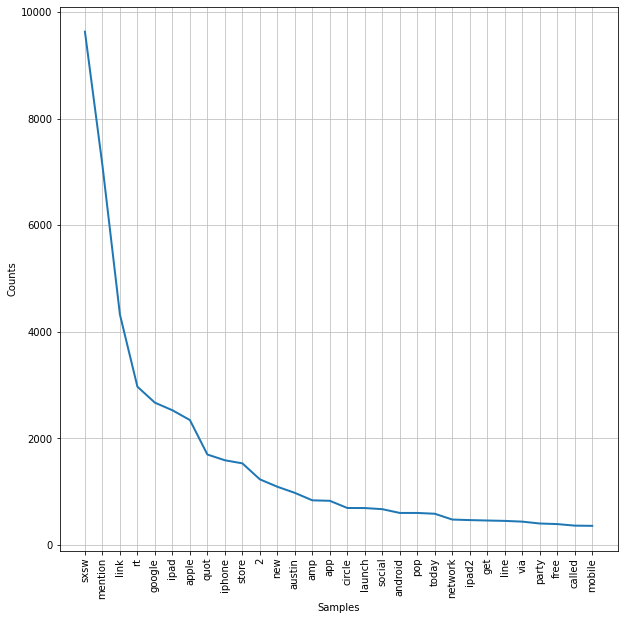

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [130]:
fdist = FreqDist(lemmatized_review)
print(fdist)
plt.figure(figsize=(10,10))
fdist.plot(30)

In [131]:
vec = CountVectorizer()
X = vec.fit_transform(df['tweet_text'])

count_df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
count_df

c:\users\stone\pycharmprojects\sentiment_analysis_nlp_project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,00am,00pm,01am,02,03,0310apple,06,08,...,ûò,ûòand,ûó,ûócan,ûójust,ûólewis,ûólots,ûómy,ûóthe,ü_
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
count_df.columns.to_list()

['00',
 '000',
 '00am',
 '00pm',
 '01am',
 '02',
 '03',
 '0310apple',
 '06',
 '08',
 '10',
 '100',
 '100s',
 '100tc',
 '101',
 '106',
 '10am',
 '10k',
 '10mins',
 '10pm',
 '10x',
 '10x2',
 '11',
 '1100',
 '1154',
 '11am',
 '11bil',
 '11ntc',
 '11p',
 '11pm',
 '11th',
 '12',
 '120',
 '1223',
 '125',
 '128',
 '12ab',
 '12am',
 '12b',
 '12bn',
 '12th',
 '13',
 '130',
 '1300',
 '1315',
 '14',
 '1406',
 '1408',
 '141164002609303',
 '1413',
 '1415',
 '141st',
 '1422',
 '1443',
 '14th',
 '15',
 '150',
 '1500',
 '150m',
 '150mm',
 '157',
 '15am',
 '15k',
 '15pm',
 '15slides',
 '16',
 '16162',
 '165',
 '169',
 '16gb',
 '16mins',
 '17',
 '18',
 '1850',
 '188',
 '19',
 '1980',
 '1980s',
 '1985',
 '1986',
 '1990style',
 '1991',
 '1k',
 '1m',
 '1of',
 '1pm',
 '1s',
 '1st',
 '20',
 '200',
 '2009',
 '200m',
 '2010',
 '2011',
 '2012',
 '206',
 '206k',
 '20s',
 '21',
 '210',
 '2100',
 '214',
 '22',
 '220',
 '222',
 '22sxsw',
 '23',
 '230',
 '24',
 '24587',
 '25',
 '250',
 '250k',
 '25th',
 '26svo3m',
 

In [133]:
cv = CountVectorizer(lowercase=True, stop_words='english', tokenizer=tokenizer.tokenize)
text_counts = cv.fit_transform(df['tweet_text'])

In [134]:
pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

c:\users\stone\pycharmprojects\sentiment_analysis_nlp_project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,00,000,00am,00pm,01am,02,03,0310apple,06,...,zms,zomb,zombie,zombies,zomg,zone,zoom,zuckerberg,zynga,zzzs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(df['tweet_text'])

pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names())

c:\users\stone\pycharmprojects\sentiment_analysis_nlp_project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,00am,00pm,01am,02,03,0310apple,06,08,...,ûò,ûòand,ûó,ûócan,ûójust,ûólewis,ûólots,ûómy,ûóthe,ü_
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [136]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",Unknown,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",Unknown,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,Unknown,No emotion toward brand or product


In [137]:
data = df['tweet_text']
target = df['is_there_an_emotion_directed_at_a_brand_or_product']

In [138]:
data

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092    Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...
Name: tweet_text, Length: 9093, dtype: object

In [139]:
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')


data = data.apply(lambda x: tokenizer.tokenize(x))


In [140]:
data

0       [wesley83, I, have, a, 3G, iPhone, After, 3, h...
1       [jessedee, Know, about, fludapp, Awesome, iPad...
2       [swonderlin, Can, not, wait, for, iPad, 2, als...
3       [sxsw, I, hope, this, year, s, festival, isn, ...
4       [sxtxstate, great, stuff, on, Fri, SXSW, Maris...
                              ...                        
9088                       [Ipad, everywhere, SXSW, link]
9089    [Wave, buzz, RT, mention, We, interrupt, your,...
9090    [Google, s, Zeiger, a, physician, never, repor...
9091    [Some, Verizon, iPhone, customers, complained,...
9092    [RT, mention, Google, Tests, Check, in, Offers...
Name: tweet_text, Length: 9093, dtype: object

<FreqDist with 12237 samples and 166995 outcomes>


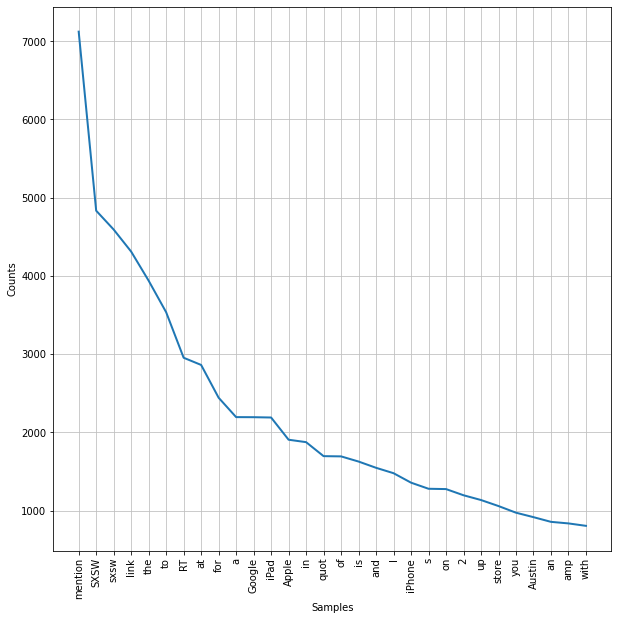

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [141]:
tokenized_review = []
for row in data:
    for w in row:
        tokenized_review.append(w)

fdist = FreqDist(tokenized_review)
print(fdist)
plt.figure(figsize=(10,10))
fdist.plot(30)

Words to add to stopword list: mention, link, RT

In [142]:
sw_list = stopwords.words('english')
sw_list += ['mention', 'link', 'RT']

In [146]:
data = data.apply(lambda row: [lemmatizer.lemmatize(x) for x in row])

0       [wesley83, I, have, a, 3G, iPhone, After, 3, h...
1       [jessedee, Know, about, fludapp, Awesome, iPad...
2       [swonderlin, Can, not, wait, for, iPad, 2, als...
3       [sxsw, I, hope, this, year, s, festival, isn, ...
4       [sxtxstate, great, stuff, on, Fri, SXSW, Maris...
                              ...                        
9088                       [Ipad, everywhere, SXSW, link]
9089    [Wave, buzz, RT, mention, We, interrupt, your,...
9090    [Google, s, Zeiger, a, physician, never, repor...
9091    [Some, Verizon, iPhone, customer, complained, ...
9092    [RT, mention, Google, Tests, Check, in, Offers...
Name: tweet_text, Length: 9093, dtype: object

In [148]:
target

0                         Negative emotion
1                         Positive emotion
2                         Positive emotion
3                         Negative emotion
4                         Positive emotion
                       ...                
9088                      Positive emotion
9089    No emotion toward brand or product
9090    No emotion toward brand or product
9091    No emotion toward brand or product
9092    No emotion toward brand or product
Name: is_there_an_emotion_directed_at_a_brand_or_product, Length: 9093, dtype: object

Most Frequent Words

In [149]:
df_freq_positive = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']
df_freq_negative = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']

In [150]:
data_positive = df_freq_positive['tweet_text']
data_negative = df_freq_negative['tweet_text']

In [151]:
data_positive

1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
7       #SXSW is just starting, #CTIA is around the co...
8       Beautifully smart and simple idea RT @madebyma...
                              ...                        
9072    @mention your iPhone 4 cases are Rad and Ready...
9077    @mention your PR guy just convinced me to swit...
9079    &quot;papyrus...sort of like the ipad&quot; - ...
9085    I've always used Camera+ for my iPhone b/c it ...
9088                        Ipad everywhere. #SXSW {link}
Name: tweet_text, Length: 2978, dtype: object

In [152]:
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

data_positive = data_positive.apply(lambda x: tokenizer.tokenize(x))
data_negative = data_negative.apply(lambda x: tokenizer.tokenize(x))

<FreqDist with 4902 samples and 35453 outcomes>


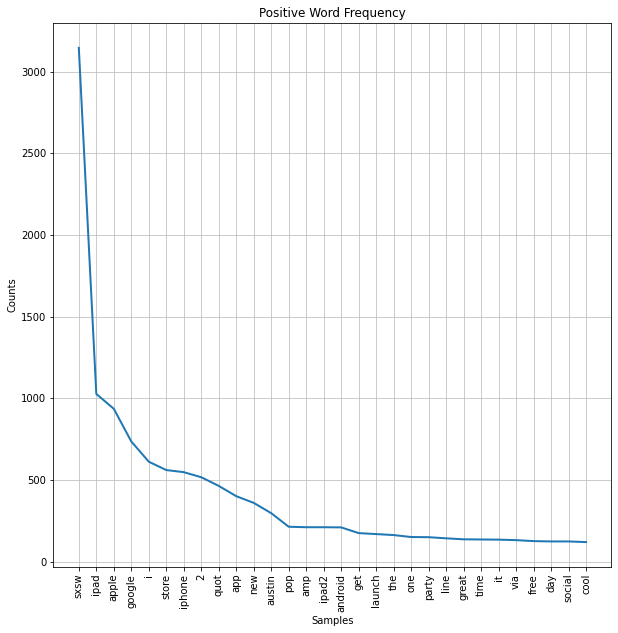

<AxesSubplot:title={'center':'Positive Word Frequency'}, xlabel='Samples', ylabel='Counts'>

In [168]:
tokenized_review = []
for row in data_positive:
    for w in row:
        if w not in sw_list:
            w = lemmatizer.lemmatize(w)
            tokenized_review.append(w.lower())

positive_fdist = FreqDist(tokenized_review)
print(positive_fdist)
plt.figure(figsize=(10,10))
plt.title('Positive Word Frequency')
positive_fdist.plot(30)

<FreqDist with 2023 samples and 7099 outcomes>


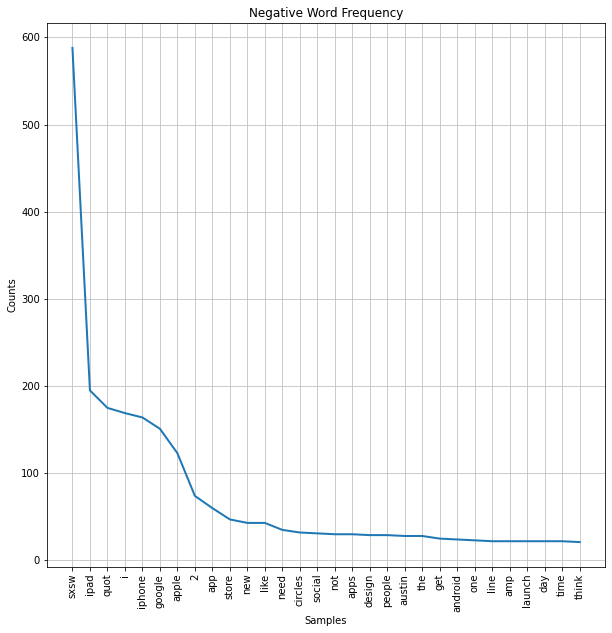

<AxesSubplot:title={'center':'Negative Word Frequency'}, xlabel='Samples', ylabel='Counts'>

In [169]:
tokenized_review = []
for row in data_negative:
    for w in row:
        if w not in sw_list:
            w = lemmatizer.lemmatize(w)
            tokenized_review.append(w.lower())

negative_fdist = FreqDist(tokenized_review)
print(negative_fdist)
plt.figure(figsize=(10,10))
plt.title('Negative Word Frequency')
negative_fdist.plot(30)

In [170]:
positive_fdist.most_common(20)

[('sxsw', 3145),
 ('ipad', 1027),
 ('apple', 936),
 ('google', 736),
 ('i', 612),
 ('store', 561),
 ('iphone', 548),
 ('2', 517),
 ('quot', 464),
 ('app', 401),
 ('new', 360),
 ('austin', 297),
 ('pop', 214),
 ('amp', 211),
 ('ipad2', 211),
 ('android', 210),
 ('get', 175),
 ('launch', 169),
 ('the', 163),
 ('one', 151)]

In [171]:
negative_fdist.most_common(20)

[('sxsw', 588),
 ('ipad', 195),
 ('quot', 175),
 ('i', 169),
 ('iphone', 164),
 ('google', 151),
 ('apple', 123),
 ('2', 74),
 ('app', 60),
 ('store', 47),
 ('new', 43),
 ('like', 43),
 ('need', 35),
 ('circles', 32),
 ('social', 31),
 ('not', 30),
 ('apps', 30),
 ('design', 29),
 ('people', 29),
 ('austin', 28)]

normalize frequencies

array([[<AxesSubplot:title={'center':'Frequency'}, xlabel='Word'>,
        <AxesSubplot:title={'center':'Normalized Frequency'}, xlabel='Word'>]],
      dtype=object)

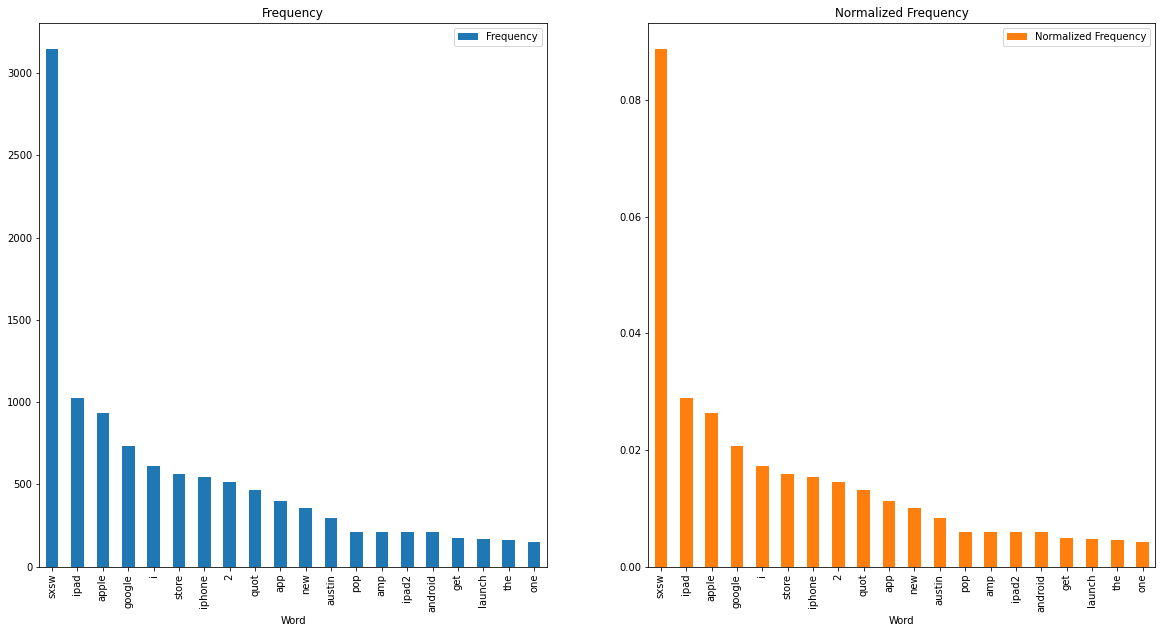

In [195]:
positive_total_word_count = sum(positive_fdist.values())
positive_top_20 = positive_fdist.most_common(20)
positive_frequency_df = pd.DataFrame(positive_top_20, columns=['Word', 'Frequency'])
positive_frequency_df = positive_frequency_df.set_index('Word')
positive_frequency_df['Normalized Frequency'] = positive_frequency_df['Frequency']/positive_total_word_count
positive_frequency_df.plot(kind='bar', subplots=True, sharex= False, layout=(1,2), figsize=(20,10))

<AxesSubplot:xlabel='Word'>

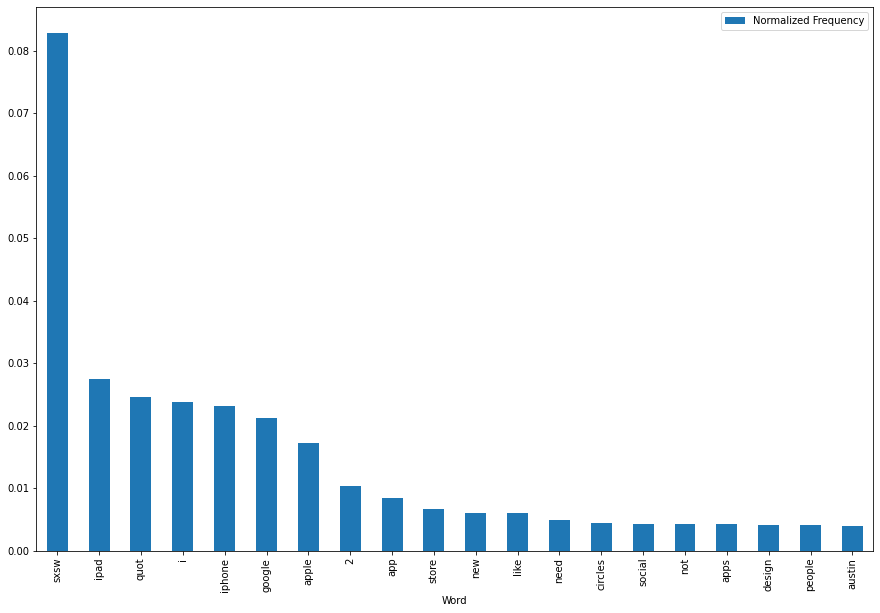

In [201]:
negative_total_word_count = sum(negative_fdist.values())
negative_top_20 = negative_fdist.most_common(20)
negative_frequency_df = pd.DataFrame(negative_top_20, columns=['Word', 'Frequency'])
negative_frequency_df = negative_frequency_df.set_index('Word')
negative_frequency_df['Normalized Frequency'] = negative_frequency_df['Frequency']/negative_total_word_count
negative_frequency_df
negative_frequency_df.plot(kind='bar', y = 'Normalized Frequency', figsize=(15,10))